In [17]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

iterations = 10
n_array = np.array([25*i for i in range(1, 11)] + [50*i for i in range(6, 11)] + [100*i for i in range(6, 11)] + [200*i for i in range(6, 11)], dtype=np.int64)
# n_array = np.array([25*i for i in range(1, 11)], dtype=np.int64)

rt_dict = {}
meanRunTimeArray = []


In [18]:

# Compile the C++ program first (adjust the command if needed for your compiler)
subprocess.run(["g++", "-o", "project_integrated.exe", "project1_integrated.cpp"])

for n in n_array:
    # Run the C++ program with the current 'n' and capture the output
    result = subprocess.run(["project_integrated.exe", str(n), str(iterations)], capture_output=True, text=True, shell=True)
    output = result.stdout
    error = result.stderr

    if error:
        print(f"Error for n={n}: {error}")
        continue

    print(f"Output for n={n}: '{output}'\n")  # Print output for debugging

    runtimes = [float(line) for line in output.strip().split('\n') if line]
    rt_dict[n] = runtimes

    # Calculate the average runtime for each 'n'
    meanRunTime = np.mean(rt_dict[n])
    meanRunTimeArray.append(meanRunTime)
    print(f"Average time for n={n}: '{meanRunTime}\n")
    
    if not rt_dict:
        print("No runtime data collected. Exiting.")
        exit()

    # Ensure avg_rt_array is not empty before proceeding
    if not meanRunTimeArray:
        print("No average runtime data collected. Exiting.")
        exit()

Output for n=25: '6.60419e-05
6.50883e-05
0.000244856
9.10759e-05
9.10759e-05
9.20296e-05
9.01222e-05
8.2016e-05
7.98702e-05
8.2016e-05
'

Average time for n=25: '9.841920000000001e-05

Output for n=50: '0.000329018
0.000327826
0.000329018
0.000822067
0.000736952
0.000638962
0.000566959
0.000470161
0.000329018
0.000328064
'

Average time for n=50: '0.0004878045

Output for n=75: '0.00112796
0.00110006
0.00113106
0.00120306
0.00145006
0.0014689
0.00182509
0.00233102
0.00129294
0.00167012
'

Average time for n=75: '0.0014600269999999998

Output for n=100: '0.00532413
0.00488186
0.0038352
0.00485396
0.00424099
0.00729203
0.00362611
0.003124
0.00355411
0.00352478
'

Average time for n=100: '0.004425717

Output for n=125: '0.00595498
0.00533915
0.00567508
0.00566006
0.00527692
0.00585413
0.00629711
0.00732017
0.00713301
0.00574112
'

Average time for n=125: '0.006025173

Output for n=150: '0.0094521
0.00897598
0.00880408
0.00836492
0.00900197
0.00851893
0.0110931
0.00959301
0.0100129
0.0107

Theoretical Peak Performance: 192.0 GFlop/s


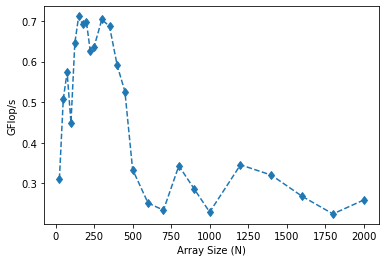

In [19]:
# Initialize an array to store the number of floating point operations.
flop_array = (n_array**2) * (2*n_array - 1)

# Calculate the performance in (Gflop/s)
performance = (flop_array / 1e9) / np.array(meanRunTimeArray)

ncores = 40  # number of cores
clkspeed = 2.4  # 3.4 GHz
fpus = 2  # FPUs/core

peakp = ncores * clkspeed * fpus

print("Theoretical Peak Performance:", peakp, "GFlop/s")

plt.figure()
plt.plot(n_array, performance, '--d')
plt.xlabel('Array Size (N)')
plt.ylabel('GFlop/s')
# plt.axhline(y=peakp, linestyle='--', color='red', label='Peak Performance')
plt.savefig('HPCCEmpiricalResults.png')
# plt.show()

In [27]:
for n, meanRunTime in zip(n_array, meanRunTimeArray):
    print(f"Mean Runtime for n = {n}: {np.round(meanRunTime,3)} s")

print("\n")

for n, i in zip(n_array, performance):
    print(f"Mean Performance for n = {n}: {np.round(i,3)} GFlops/s")

print("\n")

idx100 = np.argwhere(n_array == 100)[0][0]
meanRunTime100 = meanRunTimeArray[idx100]
performance100 = performance[idx100]
print("Mean Runtime for n = 100: ", meanRunTime100)
print("Mean Performance for n = 100: ", performance100)

Mean Runtime for n = 25: 0.0 s
Mean Runtime for n = 50: 0.0 s
Mean Runtime for n = 75: 0.001 s
Mean Runtime for n = 100: 0.004 s
Mean Runtime for n = 125: 0.006 s
Mean Runtime for n = 150: 0.009 s
Mean Runtime for n = 175: 0.015 s
Mean Runtime for n = 200: 0.023 s
Mean Runtime for n = 225: 0.036 s
Mean Runtime for n = 250: 0.049 s
Mean Runtime for n = 300: 0.077 s
Mean Runtime for n = 350: 0.125 s
Mean Runtime for n = 400: 0.217 s
Mean Runtime for n = 450: 0.346 s
Mean Runtime for n = 500: 0.747 s
Mean Runtime for n = 600: 1.714 s
Mean Runtime for n = 700: 2.928 s
Mean Runtime for n = 800: 2.981 s
Mean Runtime for n = 900: 5.094 s
Mean Runtime for n = 1000: 8.716 s
Mean Runtime for n = 1200: 9.991 s
Mean Runtime for n = 1400: 17.12 s
Mean Runtime for n = 1600: 30.533 s
Mean Runtime for n = 1800: 51.861 s
Mean Runtime for n = 2000: 61.706 s


Mean Performance for n = 25: 0.311 GFlops/s
Mean Performance for n = 50: 0.507 GFlops/s
Mean Performance for n = 75: 0.574 GFlops/s
Mean Performan